In [1]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=15,15

# Introduction
### The aim of this notebook
The aim of this notebook is to identify energy consumption patterns in world energy data, which is extracted from:
https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv
##### I aim to answer questions such as the following:
- What is the relationship of population with energy consumption? 
- How is geographical location related to energy sources?
- Are energy consumption patterns time dependent? 
- Is GDP a predictor of the energy type most commonly used?
- Which energy source is less carbon intensive?

## Step 1. Exploratory Data Analysis and Data Cleaning

In [2]:
energy_data_raw = pd.read_csv(r"C:\Users\kagan\OneDrive\Masaüstü\DATA\Ekonometri Ödev Veri Seti\owid-energy-data.csv")

In [3]:
energy_data_raw.head(200)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,1900,AFG,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,AFG,4998861.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,AFG,5063419.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Africa,1973,NaN,395212420.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0
196,Africa,1974,NaN,406069208.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0
197,Africa,1975,NaN,417556976.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0
198,Africa,1976,NaN,429573262.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0


Get all feature names

In [4]:
for i in energy_data_raw.columns:
    print(i)

country
year
iso_code
population
gdp
biofuel_cons_change_pct
biofuel_cons_change_twh
biofuel_cons_per_capita
biofuel_consumption
biofuel_elec_per_capita
biofuel_electricity
biofuel_share_elec
biofuel_share_energy
carbon_intensity_elec
coal_cons_change_pct
coal_cons_change_twh
coal_cons_per_capita
coal_consumption
coal_elec_per_capita
coal_electricity
coal_prod_change_pct
coal_prod_change_twh
coal_prod_per_capita
coal_production
coal_share_elec
coal_share_energy
electricity_demand
electricity_generation
electricity_share_energy
energy_cons_change_pct
energy_cons_change_twh
energy_per_capita
energy_per_gdp
fossil_cons_change_pct
fossil_cons_change_twh
fossil_elec_per_capita
fossil_electricity
fossil_energy_per_capita
fossil_fuel_consumption
fossil_share_elec
fossil_share_energy
gas_cons_change_pct
gas_cons_change_twh
gas_consumption
gas_elec_per_capita
gas_electricity
gas_energy_per_capita
gas_prod_change_pct
gas_prod_change_twh
gas_prod_per_capita
gas_production
gas_share_elec
gas_share

As can be seen, all of the energy types are listed with 
- consumption per capita
- total consumption of that type of energy
- how much of the energy produced from that source is distributed by population
- total electricity produced from that source
- how much from the total electricity/energy pool do they possess

Since our problem is about predicting/modeling electricity consumption/production instead of raw energy, because raw energy is produced in order to produce electricity anyway, from all these energy types "share_elec" will be chosen.

Other variables that are of interest are gdp, population, carbon intensity of electric production, electricity demand, electricty generation, greenhouse gas emissions, and net electricity imports. These variables are held in a list to make selection easier, and from all columns those end with these variables are chosen. 

In [5]:
# variables of interest
variables = ["year", "country", "gdp", "carbon_intensity_elec", "electricity_demand", "electricity_generation", 
             "greenhouse_gas_emissions", "net_elec_imports", "population"]
# energy variables
energy_vars = [feature for feature in energy_data_raw.columns if "share_elec" in feature]
# merge two lists
variables = variables + energy_vars

In [6]:
variables

['year',
 'country',
 'gdp',
 'carbon_intensity_elec',
 'electricity_demand',
 'electricity_generation',
 'greenhouse_gas_emissions',
 'net_elec_imports',
 'population',
 'biofuel_share_elec',
 'coal_share_elec',
 'fossil_share_elec',
 'gas_share_elec',
 'hydro_share_elec',
 'low_carbon_share_elec',
 'nuclear_share_elec',
 'oil_share_elec',
 'other_renewables_share_elec',
 'other_renewables_share_elec_exc_biofuel',
 'renewables_share_elec',
 'solar_share_elec',
 'wind_share_elec']

#### Get unique countries

In [7]:
countries = energy_data_raw["country"].unique()
countries

array(['Afghanistan', 'Africa', 'Africa (BP)', 'Africa (Ember)',
       'Africa (Shift)', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Aruba', 'Asia', 'Asia & Oceania (EIA)', 'Asia (Ember)',
       'Asia Pacific (BP)', 'Asia and Oceania (Shift)', 'Australia',
       'Australia and New Zealand (EIA)', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS (BP)', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central & South America (EIA)',
       'Central African Republic', 'Central America (BP)',
       'Central and South America (Shift)', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica

#### Apply log transform to the population
As population is a significantly large number, it should be scaled. For this purpose log transform will be used. 
Caution: This changes the structure of any possible model using population as a response/explanatory variable.

In [8]:
energy_data_raw.describe()

,year,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
count,21890.000000,1.802900e+04,1.111300e+04,862.000000,1337.000000,952.000000,1372.000000,5221.000000,5442.000000,5407.000000,...,6871.000000,5442.000000,2295.000000,5340.000000,5445.000000,7789.000000,8676.000000,4779.000000,6871.000000,5445.000000
mean,1973.661261,1.045117e+08,3.585114e+11,34.143052,3.449835,159.620382,47.051201,65.366646,11.032376,2.030252,...,0.580494,0.129717,274.509119,5.647746,40.340626,54.478592,14.571141,175.599518,1.358409,0.440739
std,34.960962,4.593929e+08,2.411179e+12,227.488193,11.674255,269.540042,125.445899,202.092082,46.728412,5.391375,...,2.009426,0.475138,6084.992396,31.723429,224.719509,236.096397,86.388161,623.300059,4.443910,1.533429
min,1900.000000,1.833000e+03,1.642060e+08,-100.000000,-54.584000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-100.000000,-42.829000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1945.000000,1.691561e+06,1.365898e+10,0.013250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.665000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1984.000000,6.968070e+06,4.167411e+10,8.251000,0.005000,18.697000,2.704500,0.137000,0.010000,0.067000,...,0.000000,0.000000,20.944000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2003.000000,2.538869e+07,1.744295e+11,25.328000,2.153000,238.256000,25.975500,36.301000,0.740000,1.610000,...,0.062000,0.004000,50.000000,0.105250,0.774000,0.715000,0.059000,13.208500,0.325500,0.053000
max,2022.000000,7.909295e+09,1.136302e+14,5659.328000,136.261000,1747.467000,1139.921000,2524.931000,666.280000,71.429000,...,40.000000,5.999000,242384.844000,679.413000,4872.095000,3219.852000,1848.260000,7361.917000,56.840000,24.614000


#### Create dataset of relevant features

In [9]:
energy_data_relevant = energy_data_raw[variables]
energy_data_relevant.columns

Index(['year', 'country', 'gdp', 'carbon_intensity_elec', 'electricity_demand',
       'electricity_generation', 'greenhouse_gas_emissions',
       'net_elec_imports', 'population', 'biofuel_share_elec',
       'coal_share_elec', 'fossil_share_elec', 'gas_share_elec',
       'hydro_share_elec', 'low_carbon_share_elec', 'nuclear_share_elec',
       'oil_share_elec', 'other_renewables_share_elec',
       'other_renewables_share_elec_exc_biofuel', 'renewables_share_elec',
       'solar_share_elec', 'wind_share_elec'],
      dtype='object')

In [27]:
this_century = energy_data_relevant[(energy_data_relevant["country"]=="Europe") & (energy_data_relevant["year"]>= 2000)] 
this_century["ScaledPop"] = energy_data_relevant["population"]/1000
this_century.to_excel("avrupa_enerji.xlsx")

<ipython-input-27-3e2da6dac9fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_century["ScaledPop"] = energy_data_relevant["population"]/1000
<ipython-input-27-3e2da6dac9fc>:3: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  this_century.to_excel("avrupa_enerji.xlsx")


#### Cleaning the dataset
As can be seen, all of the measurements are taken well after the early 21th century. Therefore, the dataset will be started after the year 2000.  

#### 1.1 Check for autocorrelation
This is a dataset that is recorded through time. Since there may be time dependency in these variables, autocorrelation should be considered. If not, all data points will be considered independent and models will be formed considering this. 
As merging all countries to a single feature will lose information, autocorrelation checks will be done for all features and for all countries using the Ljung-Box test statistic. Countries that show significant autocorrelation will be grouped for later examination.

In [23]:
from statsmodels.stats.diagnostic import acorr_ljungbox
test_results = {}
for country in countries:
    results_for_traits = {}
    for variable in variables[2::]:
        results_for_traits[variable] = acorr_ljungbox(energy_data_relevant[energy_data_relevant["country"]==country][variable])
    test_results[country] = results_for_traits

C:\Users\kagan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
C:\Users\kagan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
C:\Users\kagan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
C:\Users\kagan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
C:\Users\kagan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
C:\Users\kagan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] /

#### 1.2 Check for multicollinearity
As we are not working with specific variables at this point, a correlation matrix will suffice before going into other multicollinearity checks such as partial regressions and variance inflation factors.

In [28]:
energy_data_relevant.corr()

<ipython-input-28-a36f1beebb49>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  energy_data_relevant.corr()


,year,gdp,carbon_intensity_elec,electricity_demand,electricity_generation,greenhouse_gas_emissions,net_elec_imports,population,biofuel_share_elec,coal_share_elec,...,hydro_share_elec,low_carbon_share_elec,nuclear_share_elec,oil_share_elec,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,renewables_share_elec,solar_share_elec,wind_share_elec,logPop
year,1.000000,0.085729,-0.059458,0.060368,0.030271,0.029243,0.005311,0.036792,0.119838,-0.219672,...,-0.015186,0.027928,-0.132193,0.077915,0.152091,0.040261,0.071845,0.352560,0.293169,-0.065401
gdp,0.085729,1.000000,0.043607,0.991312,0.988363,0.974016,0.127374,0.858370,-0.006635,0.144486,...,-0.062975,-0.021502,0.075718,-0.094440,-0.012896,-0.010137,-0.057729,0.050098,0.049637,0.275394
carbon_intensity_elec,-0.059458,0.043607,1.000000,0.021200,0.020853,0.044143,0.101360,0.042764,-0.147584,0.298104,...,-0.843751,-0.944695,-0.238682,0.590487,-0.202264,-0.152694,-0.879619,-0.048156,-0.102701,-0.264198
electricity_demand,0.060368,0.991312,0.021200,1.000000,0.999993,0.991194,0.119863,0.892517,-0.008304,0.250765,...,-0.081955,0.002686,0.167453,-0.180224,-0.021023,-0.025135,-0.068631,0.046471,0.074087,0.405473
electricity_generation,0.030271,0.988363,0.020853,0.999993,1.000000,0.991197,0.112737,0.864947,-0.008580,0.281833,...,-0.098163,0.000248,0.201079,-0.209974,-0.028823,-0.025198,-0.088435,0.043377,0.070958,0.430182
greenhouse_gas_emissions,0.029243,0.974016,0.044143,0.991194,0.991197,1.000000,0.120497,0.912906,-0.017696,0.297785,...,-0.088707,-0.013217,0.176711,-0.181842,-0.029415,-0.025978,-0.080800,0.031841,0.054917,0.406859
net_elec_imports,0.005311,0.127374,0.101360,0.119863,0.112737,0.120497,1.000000,0.032822,0.073238,0.014843,...,-0.081382,-0.140175,-0.213838,0.020917,0.068198,0.014882,-0.054843,0.048041,0.039964,0.031609
population,0.036792,0.858370,0.042764,0.892517,0.864947,0.912906,0.032822,1.000000,-0.020455,0.235858,...,-0.048579,-0.021310,0.070812,-0.147165,-0.033384,-0.010598,-0.054046,-0.004055,0.003916,0.454844
biofuel_share_elec,0.119838,-0.006635,-0.147584,-0.008304,-0.008580,-0.017696,0.073238,-0.020455,1.000000,-0.043412,...,-0.007377,0.209297,0.012961,-0.091353,0.848887,0.061730,0.210041,0.096052,0.210167,0.005102
coal_share_elec,-0.219672,0.144486,0.298104,0.250765,0.281833,0.297785,0.014843,0.235858,-0.043412,1.000000,...,-0.253275,-0.189021,0.159903,-0.442070,-0.077472,-0.040855,-0.262065,-0.045473,0.005948,0.381501


To understand the relationship between energy consumption density, let's study some plots of population vs common energy resources, primarily
- fossil fuels
- renewables

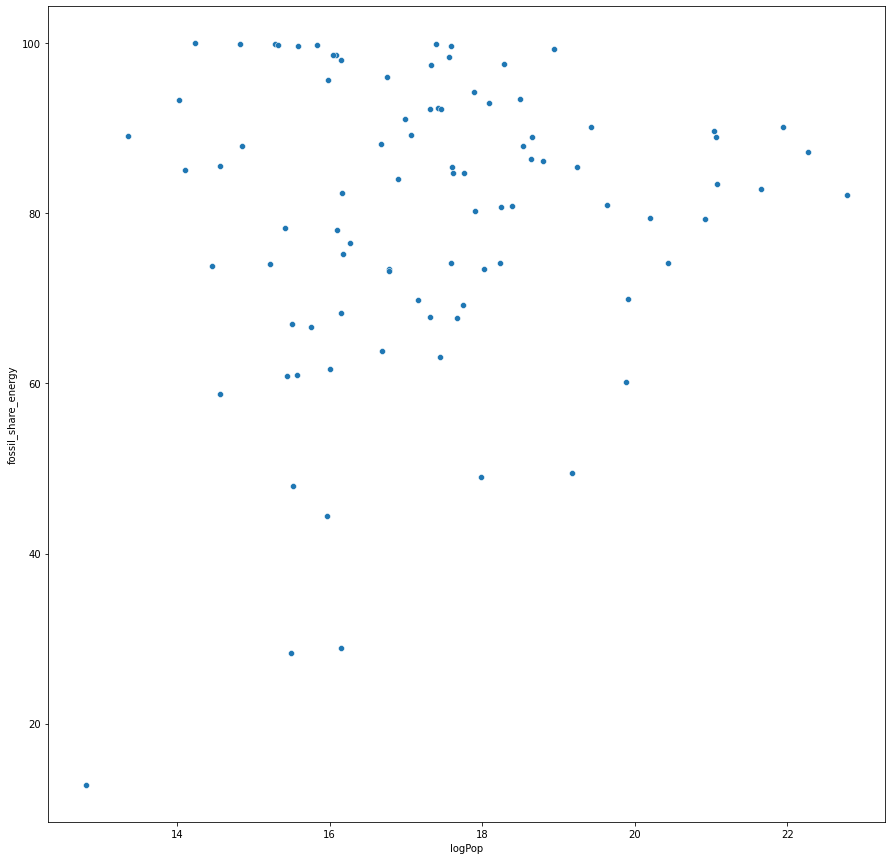

In [88]:
ax = sns.scatterplot(data = energy_data_raw[energy_data_raw["year"]==2020], x = "logPop", 
                                                                       y = "fossil_share_energy")


<AxesSubplot:xlabel='logPop', ylabel='renewables_share_energy'>

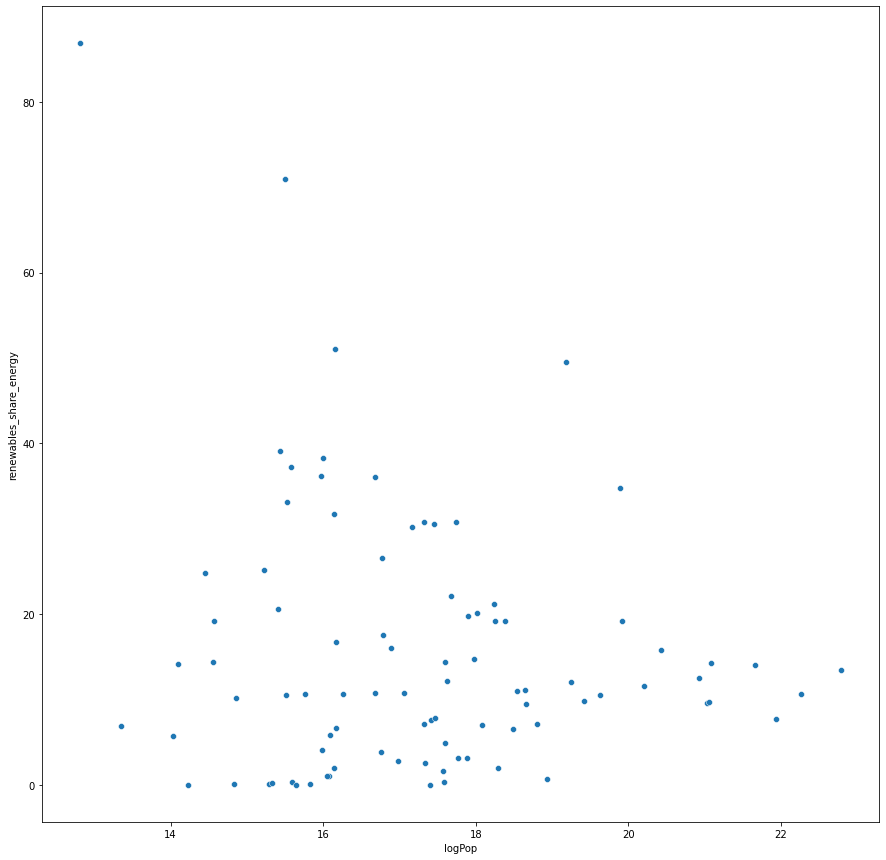

In [89]:
sns.scatterplot(data = energy_data_raw[energy_data_raw["year"]==2020], x = "logPop", y = "renewables_share_energy")

By observing these plots another question can be asked: Is there a (linear) relationship between renewable energy consumption and  